## MySQL

### Prepare

In [1]:
from datetime import datetime
f = open('MySQL/logging.txt', 'r')
students_insert_time = []
grades_insert_time = []
for line in f:
    if 'students' in line:
        students_insert_time.append(line[-9:-1])
    if 'grades' in line:
        grades_insert_time.append(line[-9:-1])

### Student

In [2]:
students_insert_second = []
students_insert_datetime = []
for time in students_insert_time:
    ts = datetime.strptime(time, '%H:%M:%S')
    students_insert_datetime.append(ts)
    students_insert_second.append(ts.second + ts.minute * 60 + ts.hour * 3600)

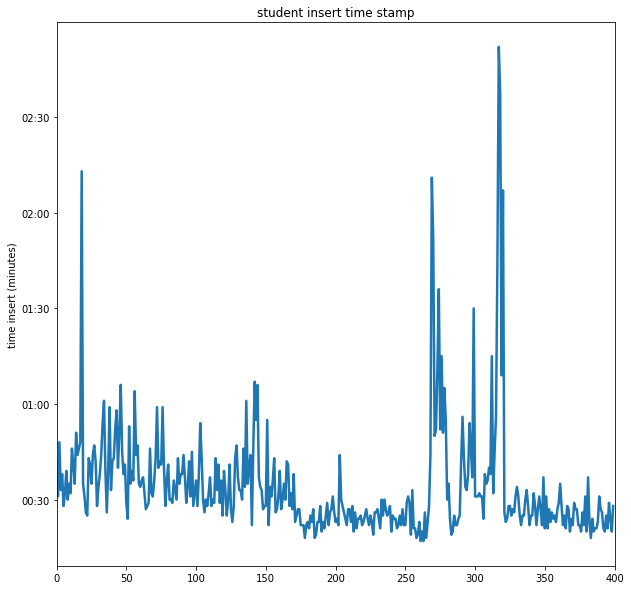

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([i for i in range(0, 400)], students_insert_datetime, linewidth=2.5)

ax.set(xlim=(0,400), ylabel='time insert (minutes)', title='student insert time stamp')

myFmt = mdates.DateFormatter('%M:%S')
plt.gca().yaxis.set_major_formatter(myFmt)
fig.savefig('student_ins_mysql.png')
plt.show()

In [4]:
import pandas as pd
import time
students_insert_second_sr = pd.Series(students_insert_second)
print(
    f'mean insert time: {time.strftime("%H:%M:%S", time.gmtime(students_insert_second_sr.mean()))}',
    f'std insert time: {time.strftime("%H:%M:%S", time.gmtime(students_insert_second_sr.std()))}', sep = '\n'
)

mean insert time: 00:00:34
std insert time: 00:00:17


### Grades

In [5]:
grades_insert_second = []
grades_insert_datetime = []
for time in grades_insert_time:
    ts = datetime.strptime(time, '%H:%M:%S')
    grades_insert_datetime.append(ts)
    grades_insert_second.append(ts.second + ts.minute * 60 + ts.hour * 3600)

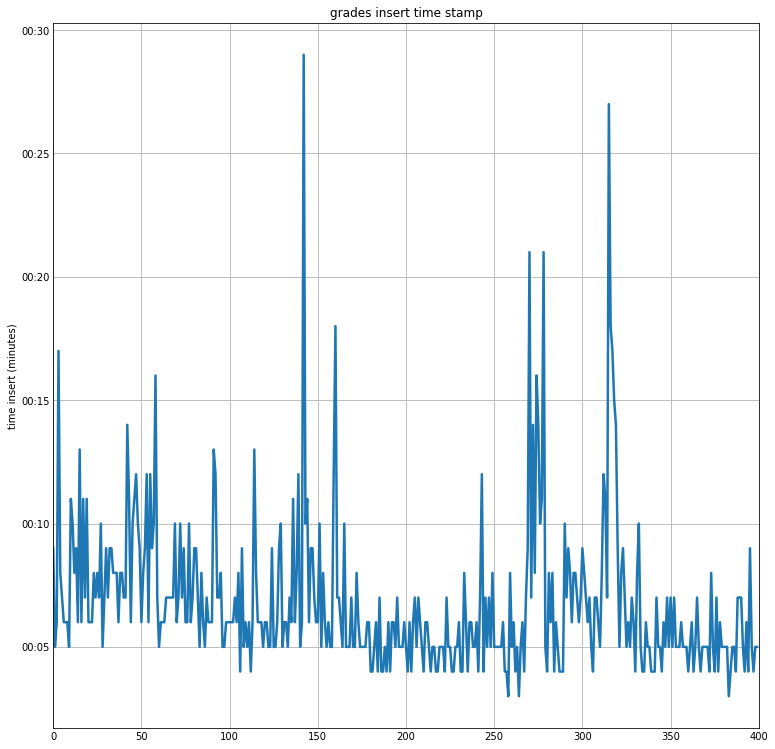

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

grades_insert_second.index
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([i for i in range(0, 400)], grades_insert_datetime, linewidth=2.5)

ax.set(xlim=(0,400), ylabel='time insert (minutes)', title='grades insert time stamp')

myFmt = mdates.DateFormatter('%M:%S')
plt.gca().yaxis.set_major_formatter(myFmt)
fig.savefig('grade_ins_mysql.png')
plt.show()

In [7]:
import pandas as pd
import time
grades_insert_second_sr = pd.Series(grades_insert_second)
print(
    f'mean insert time: {time.strftime("%H:%M:%S", time.gmtime(grades_insert_second_sr.mean()))}',
    f'std insert time: {time.strftime("%H:%M:%S", time.gmtime(grades_insert_second_sr.std()))}', sep = '\n'
)

mean insert time: 00:00:06
std insert time: 00:00:03


### To compare

In [10]:
res = []
res_sec = []
for i in range(0, 100):
    sum = 0
    for j in range(0, 4):
        index = i * 4 + j
        sum = sum + students_insert_second[index] + grades_insert_second[index]
    res_sec.append(sum)
    print(sum)
    time = datetime.fromtimestamp(
        sum
    )
    res.append(time)

184
164
175
207
297
151
199
170
232
187
234
241
165
202
232
162
158
172
214
192
160
168
186
176
158
181
156
147
166
154
149
144
190
167
217
240
205
167
147
155
169
166
142
125
106
111
106
113
121
131
132
133
120
115
113
120
107
123
128
128
122
113
123
133
98
97
113
381
323
293
134
108
172
179
255
155
147
175
265
566
231
131
147
120
133
130
127
135
119
120
133
122
115
119
121
116
104
133
110
120


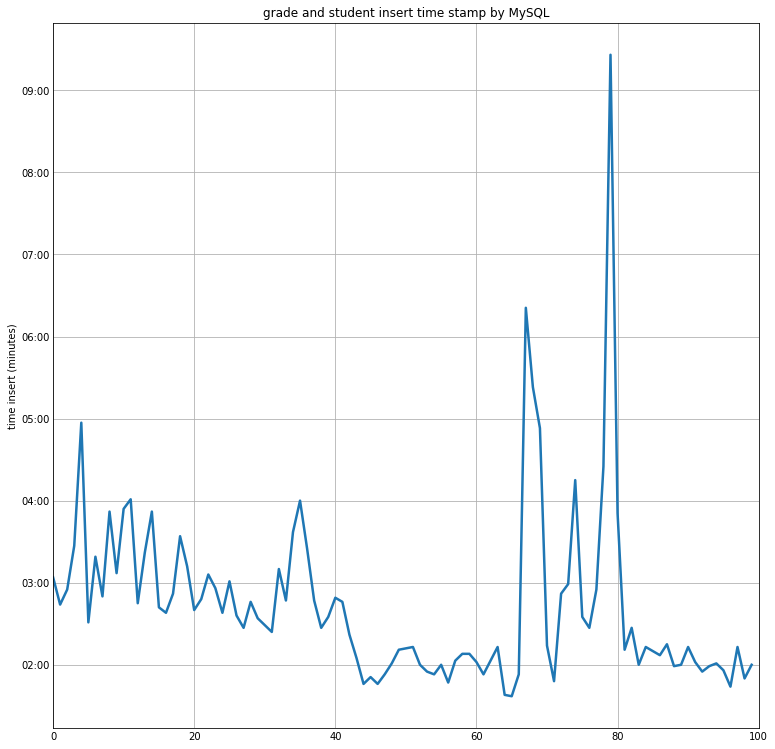

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

grades_insert_second.index
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([i for i in range(0, 100)], res, linewidth=2.5)

ax.set(xlim=(0,100), ylabel='time insert (minutes)', title='grade and student insert time stamp by MySQL')

myFmt = mdates.DateFormatter('%M:%S')
plt.gca().yaxis.set_major_formatter(myFmt)
fig.savefig('ins_mysql.png')
plt.show()

In [12]:
import time
res_sec_sr = pd.Series(res_sec)
print(
    f'mean insert time: {time.strftime("%H:%M:%S", time.gmtime(res_sec_sr.mean()))}',
    f'std insert time: {time.strftime("%H:%M:%S", time.gmtime(res_sec_sr.std()))}', 
    f'total insert time: {time.strftime("%H:%M:%S", time.gmtime(res_sec_sr.sum()))}',sep = '\n'
)

mean insert time: 00:02:44
std insert time: 00:01:05
total insert time: 04:33:38


## MongoDB

In [18]:
from datetime import datetime

f = open('MongoDB/logging.txt')
created = []
inserted = []
for line in f:
    if 'classes' in line: continue
    if 'created' in line:
        ts = datetime.strptime(line[-9: -1], '%H:%M:%S')
        ts = ts.minute * 60 + ts.second
        created.append(ts)
    if 'inserted' in line:
        ts = datetime.strptime(line[-9: -1], '%H:%M:%S')
        ts = ts.minute*60 + ts.second
        inserted.append(ts)

In [19]:
import time
ins_res = []
ins_res_sec = []
for i in range(0, len(created) - 1):
    ins_res_sec.append(created[i] + inserted[i])
    ins_res.append(time.strftime("%H:%M:%S", time.gmtime(created[i] + inserted[i])))

In [20]:
res_ins_datetime = []
for ts in ins_res:
    time = datetime.strptime(ts, '%H:%M:%S')
    res_ins_datetime.append(time)

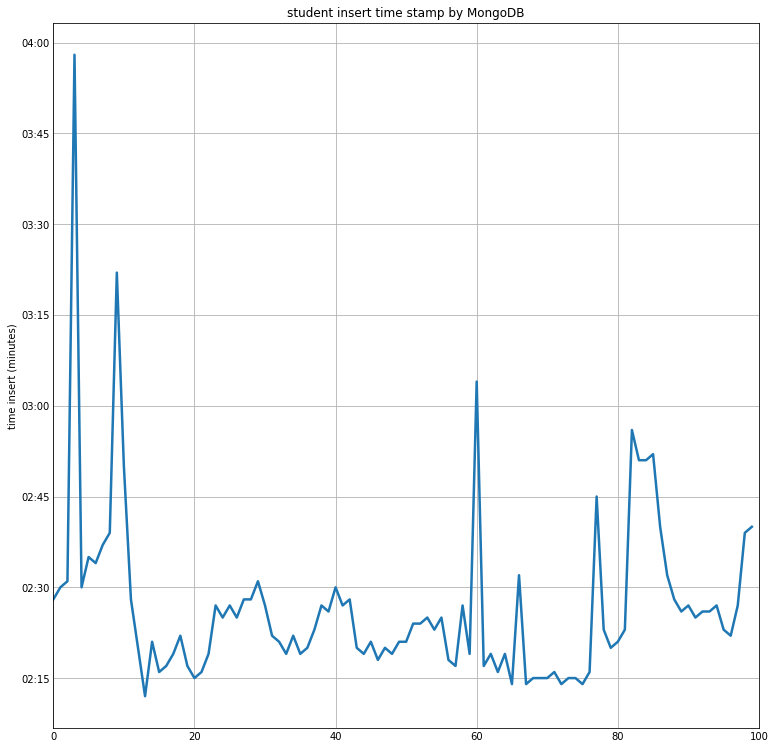

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([i for i in range(0, len(ins_res))], res_ins_datetime, linewidth=2.5)

ax.set(xlim=(0, len(ins_res)), ylabel='time insert (minutes)', title='student insert time stamp by MongoDB')

myFmt = mdates.DateFormatter('%M:%S')
plt.gca().yaxis.set_major_formatter(myFmt)
fig.savefig('ins_mongodb.png')
plt.show()

In [23]:
import time
ins_res_sec_sr = pd.Series(ins_res_sec)
print(
    f'mean insert time: {time.strftime("%H:%M:%S", time.gmtime(ins_res_sec_sr.mean()))}',
    f'std insert time: {time.strftime("%H:%M:%S", time.gmtime(ins_res_sec_sr.std()))}', 
    f'sum insert time: {time.strftime("%H:%M:%S", time.gmtime(ins_res_sec_sr.sum()))}', sep = '\n'
)

mean insert time: 00:02:26
std insert time: 00:00:14
sum insert time: 04:04:39
